# Analysis of COVID-19 dataset

### **Iacopo Erpichini** e-mail: iacopo.erpichini@stud.unifi.it  
### ADVANCED ALGORITHMS AND GRAPH MINING

The following work is an analysis based on data taken from "Dipartimento della protezione civile Italiana" ([github](https://github.com/pcm-dpc/COVID-19)) and it is used for familiarize with Python 3.7 notebook and [Pandas](https://pandas.pydata.org/) that is a library used for data analysis.

The data are collected based on the infection and the emergency in our country but in this analysis the focus is on two [JSON](https://www.json.org/json-en.html) datasets:
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json

In particular these two datasets represent the contagious status in the Italian Regions and Provinces.

All the data are explained in details here:
    - Data Format: https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md
    
It is very important to read the Data Format to make complex statistics and understanding what is collected from "Dipartimento della protezione civile Italiana".

## Index
1. [Loading data](#1)
2. [Regions analisys](#2)
3. [Province analisys](#3)
4. [Data preparation for heatmap](#4)
5. [Heatmap with data](#5)
6. [Extra](#6)

The libraries used in this project are the following imported, in particular pandas and geopandas are used because they have the dataframe object to manipulate the data, other libraries are used to manipulate raw data and make some plot.

## Testing machine spec
All the test are runned on a machine with this specs:
+ CPU: `Intel® Core™ i7-10750H, # of Cores: 6, # of Threads: 12, up to 5.00 GHz`
+ RAM: `2x8 Gb DDR4 2666 MHz`
+ OS: `Ubuntu 20.04.1 LTS`



In [627]:
# install geopandas for made heatmap later
INSTALL = False
if INSTALL:
    !pip install git+git://github.com/geopandas/geopandas.git
    # if u don't have numpy,pandas or matplotlib -> use -> !pip install <name>

In [628]:
# importing the library
import os
import io
import json
import math
import shutil
import zipfile
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import warnings
warnings.filterwarnings('ignore')

### Download the last data
First remove the old directory if exists then download the data provided by Protezione Civile

In [629]:
DOWNLOAD_DATA = False
if DOWNLOAD_DATA:
    #remove old data
    dir_path = 'COVID-19'
    shutil.rmtree(dir_path)
    # download the data
    !git clone https://github.com/pcm-dpc/COVID-19.git

In [630]:
ls #check the directory

COVID-19/        Erpichini.py  Limiti01012018/          README.md
Erpichini.ipynb  functions.py  popolazione_regione.csv  test.py
Erpichini.pdf    img/          __pycache__/             utils.py


## Prepare the data for Pandas <a name="1"></a>

Here there is a preliminary data analysis to understand how data are collected using simple Python dictionary

In [631]:
data_folder_path = "COVID-19/dati-json/"

with open(os.path.join(data_folder_path, "dpc-covid19-ita-regioni.json")) as file:
    regions = json.load(file)

with open(os.path.join(data_folder_path, "dpc-covid19-ita-province.json")) as file:
    provinces = json.load(file)

In [632]:
regions[0] # this show an element of regions

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'codice_regione': 13,
 'denominazione_regione': 'Abruzzo',
 'lat': 42.35122196,
 'long': 13.39843823,
 'ricoverati_con_sintomi': 0,
 'terapia_intensiva': 0,
 'totale_ospedalizzati': 0,
 'isolamento_domiciliare': 0,
 'totale_positivi': 0,
 'variazione_totale_positivi': 0,
 'nuovi_positivi': 0,
 'dimessi_guariti': 0,
 'deceduti': 0,
 'casi_da_sospetto_diagnostico': None,
 'casi_da_screening': None,
 'totale_casi': 0,
 'tamponi': 5,
 'casi_testati': None,
 'note': None}

In [633]:
provinces[0] # this show an element of provinces

{'data': '2020-02-24T18:00:00',
 'stato': 'ITA',
 'codice_regione': 13,
 'denominazione_regione': 'Abruzzo',
 'codice_provincia': 66,
 'denominazione_provincia': "L'Aquila",
 'sigla_provincia': 'AQ',
 'lat': 42.35122196,
 'long': 13.39843823,
 'totale_casi': 0,
 'note': None}

The two object are dictionaries, it is possible to see how the single item of each JSON data is made.

The same file may be open like a csv file that is much similar to a Pandas dataframe but the conversion from dictionary to dataframe is made with a Pandas method.

In the region JSON there is a lot of information about COVID and in the province there are only data about total cases of COVID per province.

### Pandas DataFrame

Pandas is an intuitive and well documentated library and the data loading as dataframe is simple, also this format has a lot of methods and functions for analysis.

In [634]:
df_regions = pd.DataFrame(regions)
df_provinces = pd.DataFrame(provinces)

Now to replicate the same content of each dataframe like the dictionary we can use the function head(int) from Pandas that displays the content of the first element in the dataframe.

In [635]:
df_regions.head(1)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,None


In [636]:
df_provinces.head(1)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None


#### Describe()
A very interesting function to analyze the data is the describe function that give a descriptive statistics including those which summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In our case, it is interesting to evaluate the mean, minimum and maximum of "ricoverati_con_sintomi" or "terapia_intensiva" columns but it is not important the mean value of "lat" or "codice_regione" because this value has no sense with this type of data, therefore it is important to analyze every aspect of the data.

In [637]:
df_regions.describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
count,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,5943.000000,3381.000000,3381.000000,5943.000000,5.943000e+03,4.788000e+03
mean,11.857143,43.046293,12.225955,495.504964,54.303887,549.808851,5317.597846,5867.406697,128.051321,276.257446,8876.029446,1455.418139,16575.087548,6358.646554,16198.857143,3.411775e+05,2.534578e+05
std,6.274326,2.488990,2.659171,1262.011124,133.455009,1391.150104,15102.344077,15996.742681,694.551974,809.814282,18985.895135,3336.395569,32261.971905,15092.777551,34620.596198,5.286446e+05,3.231863e+05
min,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-14488.000000,-229.000000,0.000000,0.000000,400.000000,0.000000,0.000000,0.000000e+00,3.482000e+03
25%,7.000000,41.125596,11.121231,15.000000,1.000000,17.000000,135.500000,164.000000,-3.000000,4.000000,703.500000,97.000000,2082.000000,117.000000,1371.000000,3.756900e+04,6.435800e+04
50%,12.000000,43.616760,12.388247,90.000000,9.000000,101.000000,718.000000,874.000000,6.000000,29.000000,2799.000000,376.000000,5394.000000,1500.000000,4540.000000,1.491540e+05,1.340345e+05
75%,17.000000,45.434905,13.768136,363.000000,44.000000,418.000000,2909.500000,3523.500000,78.500000,152.000000,8167.500000,1081.500000,19315.000000,5531.000000,14329.500000,3.753210e+05,2.987920e+05
max,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,10263.000000,11489.000000,274189.000000,22279.000000,305002.000000,113150.000000,415264.000000,4.143566e+06,2.372367e+06


In [638]:
df_provinces.describe()

,codice_regione,codice_provincia,lat,long,totale_casi
count,39605.000000,39605.000000,30281.000000,30281.000000,39605.000000
mean,10.360510,265.699735,42.908522,12.096599,2430.648681
std,5.995172,382.937750,2.631552,2.660590,6410.849327
min,1.000000,1.000000,36.925092,7.320149,0.000000
25%,5.000000,35.000000,40.914047,9.828190,101.000000
50%,9.000000,70.000000,43.715532,12.104734,627.000000
75%,16.000000,109.000000,45.185093,14.167546,2485.000000
max,22.000000,999.000000,46.499335,18.171897,154119.000000


Pandas gives the possibility to analyze every aspect of a data and to use the right type for every data to made the right statistics, so it is important to control and maybe remove not useful data for analysis.

For a preliminary analysis on data, the columns "stato", "note", "lat", "long" are removed.

In [639]:
df_regions.drop(columns=["stato", "note", "lat", "long"],inplace=True)
df_provinces.drop(columns=["stato", "note"],inplace=True) 
# type of fields in dataframe region
df_regions.dtypes
# df_regions.shape this gave the number of rowsxcolumn

data                             object
codice_regione                    int64
denominazione_regione            object
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
dtype: object

Moreover, we can see through the .dtypes method that the field "data" is an object type and therefore to use it later in some other methods we have to normalize it in a DatetimeIndex in the two tables.

In [640]:
df_regions["data"] = pd.DatetimeIndex(df_regions["data"]).normalize()
df_provinces["data"] = pd.DatetimeIndex(df_provinces["data"]).normalize()

## Region analysis<a name="2"></a>

In this analysis the choices of indexes can be done using a multi-index setting the fields "data" and "denominazione_regione"; thanks to the multi-inev we can also sort the table.
The same thing could be done also with the provinces.

In [641]:
df_region_index = df_regions.set_index(["data", "denominazione_regione"]).sort_index()
df_region_index.head()

codice_regione  ricoverati_con_sintomi  \
data       denominazione_regione                                           
2020-02-24 Abruzzo                            13                       0   
           Basilicata                         17                       0   
           Calabria                           18                       0   
           Campania                           15                       0   
           Emilia-Romagna                      8                      10   

                                  terapia_intensiva  totale_ospedalizzati  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                                0                     0   
           Basilicata                             0                     0   
           Calabria                               0                     0   
           Campania                               0                     0   
           Emilia-Romagna                         2                    12   

                                  isolamento_domiciliare  totale_positivi  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                                     0                0   
           Basilicata                                  0                0   
           Calabria                                    0                0   
           Campania                                    0                0   
           Emilia-Romagna                              6               18   

                                  variazione_totale_positivi  nuovi_positivi  \
data       denominazione_regione                                               
2020-02-24 Abruzzo                                         0               0   
           Basilicata                                      0               0   
           Calabria                                        0               0   
           Campania                                        0               0   
           Emilia-Romagna                                  0              18   

                                  dimessi_guariti  deceduti  \
data       denominazione_regione                              
2020-02-24 Abruzzo                              0         0   
           Basilicata                           0         0   
           Calabria                             0         0   
           Campania                             0         0   
           Emilia-Romagna                       0         0   

                                  casi_da_sospetto_diagnostico  \
data       denominazione_regione                                 
2020-02-24 Abruzzo                                         NaN   
           Basilicata                                      NaN   
           Calabria                                        NaN   
           Campania                                        NaN   
           Emilia-Romagna                                  NaN   

                                  casi_da_screening  totale_casi  tamponi  \
data       denominazione_regione                                            
2020-02-24 Abruzzo                              NaN            0        5   
           Basilicata                           NaN            0        0   
           Calabria                             NaN            0        1   
           Campania                             NaN            0       10   
           Emilia-Romagna                       NaN           18      148   

                                  casi_testati  
data       denominazione_regione                
2020-02-24 Abruzzo                         NaN  
           Basilicata                      NaN  
           Calabria                        NaN  
           Campania                        NaN  
           Emilia-Romagna                  NaN

Thanks to this index it is possible to use the .loc on dataframe to resume the actual situation of Covid-19 in Italy; Pandas gives also the possibility to add a new column with aggregated data. Then we will make some analysis based on Regions and on Provinces tables.

An interesting preliminary thing is to display a scatter plot that reveals relationships or associations between variables. The relationship between variables is called correlation.

This plot is made with the following columns: "deceduti", "totale_casi", "dimessi_guariti", "tamponi". These data are the actual number of cases, deaths, etc. per each region today.

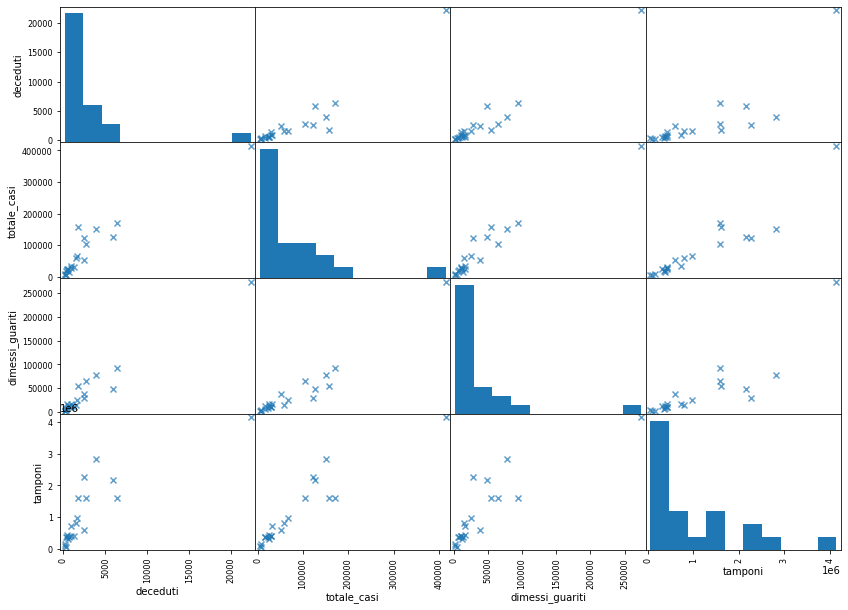

In [642]:
data_to_plot = df_regions.loc[df_regions.data == df_regions.iloc[[-1]]["data"].item()]
data_to_plot = data_to_plot[["data", "deceduti",
               "totale_casi","dimessi_guariti", "tamponi"]]
ax = pd.plotting.scatter_matrix(data_to_plot, alpha=0.7,figsize=(14,10),marker='x')

#### TODAY SITUATION

A first analysis of the region data is made to get a view of national statistics to examine the total number of deaths, recovered and infected since the beginning of the pandemic.

In [643]:
# use loc on pandas series for retrive the last element that is the today data
today = df_regions.loc[df_regions.data == df_regions.iloc[[-1]]["data"].item()]
today = today[["data", "denominazione_regione", "deceduti", "totale_ospedalizzati",
               "totale_casi","dimessi_guariti", "tamponi"]]
today["percentuale_guariti"] = today["dimessi_guariti"] / today["totale_casi"] * 100
display(today)

,data,denominazione_regione,deceduti,totale_ospedalizzati,totale_casi,dimessi_guariti,tamponi,percentuale_guariti
5922,2020-12-02,Abruzzo,927,777,28801,9890,419970,34.339085
5923,2020-12-02,Basilicata,153,179,8455,1945,154957,23.004140
5924,2020-12-02,Calabria,310,447,17262,6062,369710,35.117599
5925,2020-12-02,Campania,1764,2237,158274,54015,1615159,34.127526
5926,2020-12-02,Emilia-Romagna,5874,2939,126110,48931,2156981,38.800254
5927,2020-12-02,Friuli Venezia Giulia,889,710,32198,16616,734865,51.605690
5928,2020-12-02,Lazio,2476,3632,123240,28860,2265780,23.417722
5929,2020-12-02,Liguria,2423,1065,52372,37950,609306,72.462384
5930,2020-12-02,Lombardia,22279,8077,415264,274189,4143566,66.027635
5931,2020-12-02,Marche,1289,650,30564,10706,417126,35.028138


### *Interactive Cell*

This cell and others marked as *Interactive Cell* in this notebook can be modified in a easy way by the user to retrive different information.

With Pandas it is possible to retrive statistics on column with the method of the class dataframe, so there is a little intuitive interactive code to make statistics for retriving the min or max region with the following fields: "deceduti", "totale_ospedalizzati", "totale_casi", "dimessi_guariti", "tamponi".

In [644]:
# choose the parameters, column_name is the name of the statistics 
KEY = "deceduti"# EG: "totale_ospedalizzati","totale_casi","dimessi_guariti", "tamponi", "percentuale_guariti"
OPERATION = "min" # "min","max" are the operation 
if OPERATION=="min":
    display(today.loc[today[KEY].idxmin()])
elif OPERATION=="max":
    display(today.loc[today[KEY].idxmax()])

data                     2020-12-02 00:00:00
denominazione_regione                 Molise
deceduti                                 127
totale_ospedalizzati                      74
totale_casi                             4868
dimessi_guariti                         2158
tamponi                                93645
percentuale_guariti                  44.3303
Name: 5932, dtype: object

### Nowaday COVID-19 National statistics

Through the sum function of Pandas it is possible to have the national statistics of COVID-19

In [645]:
today.drop(columns=["denominazione_regione", "percentuale_guariti"],inplace=True)

In [646]:
today.sum(axis = 0, skipna = True)

deceduti                   57045
totale_ospedalizzati       36070
totale_casi              1641610
dimessi_guariti           823335
tamponi                 22334342
dtype: int64

In [647]:
today.drop(columns=["data","tamponi","totale_casi"],inplace=True)

The emergency in Italy could actually be visualized with a pie chart that represents the percentage of how many victims the COVID-19 has caused in relation with the number of people that are infected right now, or which are in hospital recovery and how many people have already won this disease.

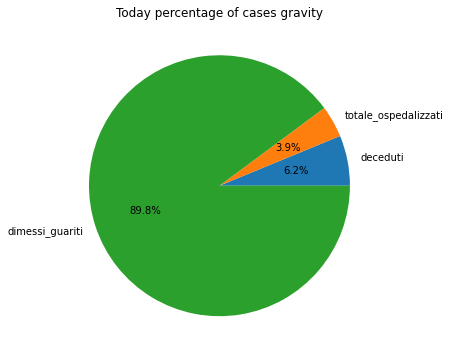

In [648]:
ax = today.sum(axis = 0, skipna = True).plot.pie(title="Today percentage of cases gravity",figsize=(12,6), autopct='%1.1f%%',
        shadow=False, legend = False)
ax.set_ylabel(None);

Now the next step is to display a simple graph that explains the total cases variation during the evolution of COVID-19 in Italy. 

From the following plot, we can observe that there were two different waves of Covid infection one at the beginning of the 2020 and one after summer, indeed we know that this summer the contagious were near to a few hundred per week.
Another information that we can gather is that the second wave is much more dangerous than the first one but later we will observe that the gravity may be the same because nowadays the number of tested people is much higher.

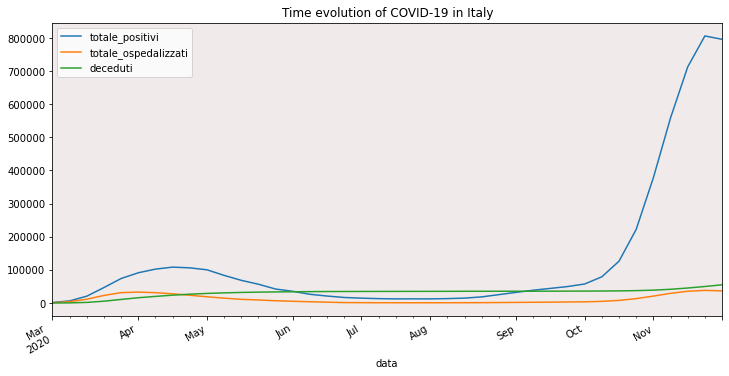

In [649]:
# data manipulation
# first chose the data to display and group by column "data" with week frequency
data_to_plot = df_regions[["data","totale_positivi","totale_ospedalizzati","deceduti"]]
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
ax = data_to_plot.plot(figsize=(12,6),title="Time evolution of COVID-19 in Italy")
ax.set_facecolor("#F0EBEA")
plt.gcf().autofmt_xdate()

We report the two periods relative to the seriousness of the disease with the fields "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare" in the first and second (actual) wave.

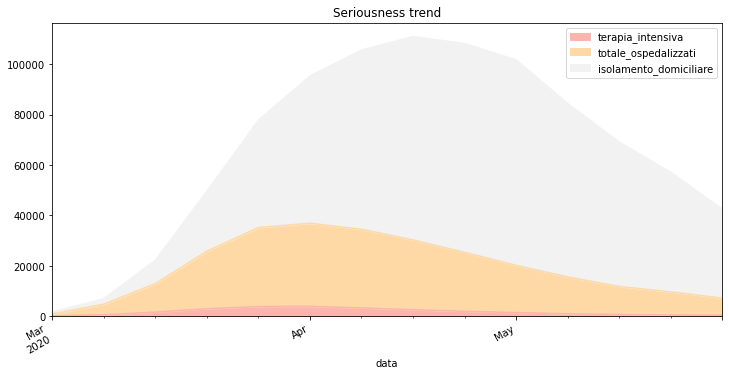

In [650]:
# data manipulation

# chose the data to display 
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
# focus on the first 3 months data<"2020-06-01T18:00:00" 
# data field can be changed for made different views
data_to_plot = data_to_plot.loc[data_to_plot["data"]<"2020-06-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(12,6),title="Seriousness trend",colormap="Pastel1")
plt.gcf().autofmt_xdate()

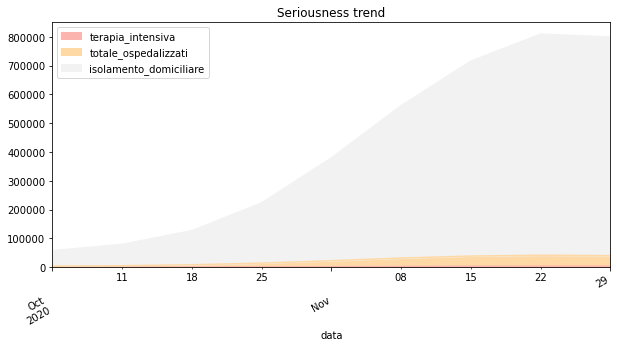

In [651]:
# data manipulation
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
# focus on the last 2 months data>2020-10-01T18:00:00
# data field can be changed for made different views

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-10-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(10,5),title="Seriousness trend",colormap="Pastel1")
plt.gcf().autofmt_xdate()

In the second wave graph it is not possible to see how many people are in the "terapia_intensiva" field therefore we decide to remove this field and to make another plot to better understand the actual situation in "terapia_intensiva" and "totale_ospedalizzati".

Instead, home isolation cases are now higher than in the first wave and this fact is due to better tracking of the virus while we see that the other two columns are similar to the values of March 2020.

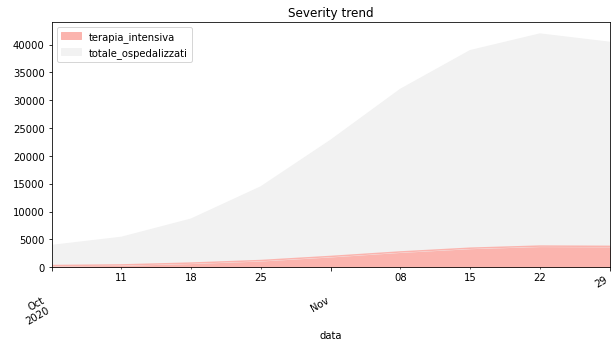

In [652]:
data_to_plot = df_regions[["data","terapia_intensiva","totale_ospedalizzati"]]
# focus on the last 2 months data>2020-10-01T18:00:00
# data field can be changed for made different views

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-10-01"]
# group by data with week frequency
data_to_plot = data_to_plot.groupby(["data"]).sum().asfreq("W")

# start plotting for this data i use the .plot() of pandas      
data_to_plot.plot.area(figsize=(10,5),title="Severity trend",colormap="Pastel1")
plt.gcf().autofmt_xdate()

We manipulate a little bit the data to compute the statistics about the new cases on tested people ratio.

In [653]:
# data manipulation

NUMERO_REGIONI = df_regions.denominazione_regione.unique().shape[0]
# print("Number of region: ", NUMERO_REGIONI)
tamponi_per_giorno = []
old_value_tamp = dict()

for row in df_regions.itertuples():
    # 
    if row.denominazione_regione in old_value_tamp.keys():
        tamponi_per_giorno.append(row.tamponi - old_value_tamp[row.denominazione_regione])
    else:
        tamponi_per_giorno.append(row.tamponi)
        
    old_value_tamp[row.denominazione_regione] = row.tamponi
    # print("Data: ", row.data, " --- Old caso tamponi: ", row.tamponi)
    
df_regions["tamponi_per_giorno"] = tamponi_per_giorno

new_values = []
flags = []
index = 0
aux_list = []
for pos, tamp in zip(df_regions.nuovi_positivi, df_regions.tamponi_per_giorno):
    index += 1
    if (pos <= 0 or tamp <= 0):
        # is not a good value, i use flag = false for indicate that this row is not good and i discard later
        flags.append(False)
        NUMERO_REGIONI -= 1 # -one region per day cause i discard the row
    else:
        flags.append(True) #if is goog i append the pos*100/tamp
        aux_list.append((pos * 100) / (tamp))
        
    # if index%21 == 0 i have save the data of all regions for one date so i append in the real data
    if index % 21 == 0:
        for a in aux_list:
            new_values.append(a/NUMERO_REGIONI) # divided for the num reg modified because i discard some rows
        aux_list = []
        NUMERO_REGIONI = df_regions.denominazione_regione.unique().shape[0] #reset original number of region


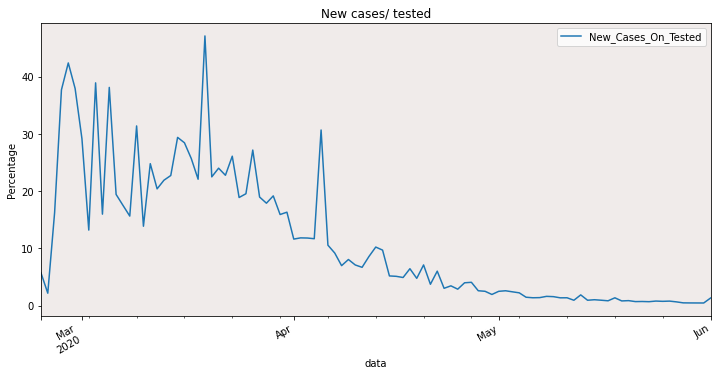

In [654]:
# data manipulation 
data_to_plot = df_regions[["data"]]
data_to_plot = data_to_plot.loc[flags] # remove rows with bad value
data_to_plot["New_Cases_On_Tested"] = new_values # insert new good values


data_to_plot = data_to_plot.loc[data_to_plot["data"]<"2020-06-01T18:00:00"]
data_to_plot = data_to_plot.groupby(["data"]).sum()

# start plotting for this data i use the .plot() of pandas      
ax = data_to_plot.plot(kind='line',figsize=(12,6),title="New cases/ tested")
ax.set_facecolor("#F0EBEA")
ax.set_ylabel("Percentage")
plt.gcf().autofmt_xdate()

In the first wave the majority of swabs were positive since it was difficult find a swab and very often it was performed only in cases of hospitalization. 

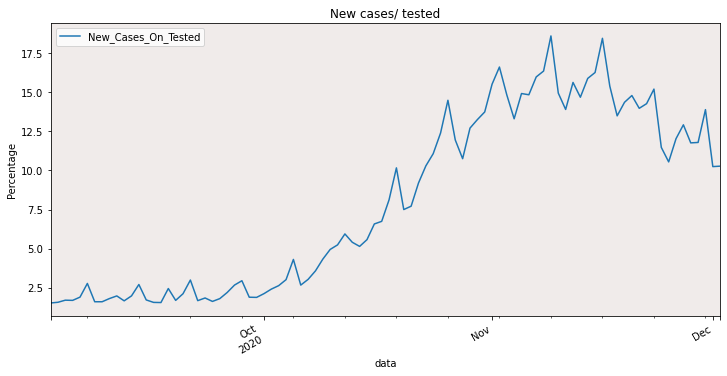

In [655]:
# data manipulation 
data_to_plot = df_regions[["data"]]
data_to_plot = data_to_plot.loc[flags] # remove rows with bad value
data_to_plot["New_Cases_On_Tested"] = new_values # insert new good values

data_to_plot = data_to_plot.loc[data_to_plot["data"]>"2020-09-01T18:00:00"]
data_to_plot = data_to_plot.groupby(["data"]).sum()

# start plotting for this data i use the .plot() of pandas      
ax = data_to_plot.plot(kind='line',figsize=(12,6),title="New cases/ tested")
ax.set_facecolor("#F0EBEA")
ax.set_ylabel("Percentage")
plt.gcf().autofmt_xdate()

While, during the second wave, the percentage of new cases on people tested is lower than the first one, this is probably due to the fact that the government is better prepared and so it can manage more swabs.

It is also possible to note the effects of the second lockdown since in the second half of November the percentage decreases.

### *Interactive Cell*

Here is possible to select how many regions are displayed, from 1 to 20, and the column field name to plot time evolution.

The following plots are respectively related to the first and second wave.

In [656]:
NUM_REGIONS = 5
# KEY showed in the following two graph
# "totale_casi", "tamponi", "totale_positivi","totale_ospedalizzati","deceduti"
# "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"
KEY = "terapia_intensiva" 

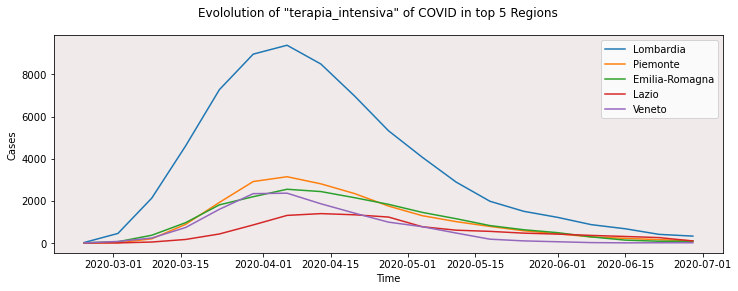

In [657]:
data_to_plot = df_regions[["denominazione_regione","totale_casi","tamponi",
                           "totale_positivi","totale_ospedalizzati","deceduti",
                           "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
aux_df = data_to_plot.groupby(["denominazione_regione"]).max().nlargest(NUM_REGIONS, KEY)
nomi_regioni = list(aux_df.index) #print(nomi_province) #create a list with the max affected provinces

# select only the rows with most affected regions
df_plot = df_regions.loc[df_regions.denominazione_regione.isin(nomi_regioni)]
#select time frist wave
df_plot = df_plot.loc[df_plot["data"]<"2020-07-01T18:00:00"]
df_plot = df_plot.groupby(['denominazione_regione', pd.Grouper(key='data', freq='W-MON')])[KEY].sum().reset_index()
# in this case i cant use .asfreq() so i have used pd.Grouper()

# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for reg in nomi_regioni:
    aux = df_plot.loc[df_plot.denominazione_regione == reg]
    #dont print last week because grouper set a wrong value
    plt.plot(aux["data"][:-1], aux[KEY][:-1], label=reg) 

fig.suptitle("Evololution of \"" + KEY + "\" of COVID in top " + str(NUM_REGIONS)+ " Regions")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA")
plt.legend()
plt.show()

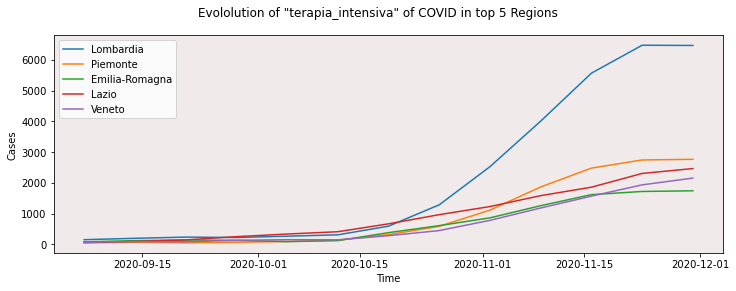

In [658]:
data_to_plot = df_regions[["denominazione_regione","totale_casi","tamponi",
                           "totale_positivi","totale_ospedalizzati","deceduti",
                           "terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare"]]
aux_df = data_to_plot.groupby(["denominazione_regione"]).max().nlargest(NUM_REGIONS, KEY)
nomi_regioni = list(aux_df.index) #print(nomi_province) #create a list with the max affected provinces

# select only the rows with most affected regions
df_plot = df_regions.loc[df_regions.denominazione_regione.isin(nomi_regioni)]
#select time frist wave
df_plot = df_plot.loc[df_plot["data"]>"2020-09-01T18:00:00"]
df_plot = df_plot.groupby(['denominazione_regione', pd.Grouper(key='data', freq='W-MON')])[KEY].sum().reset_index()
# in this case i cant use .asfreq() so i have used pd.Grouper()

# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for reg in nomi_regioni:
    aux = df_plot.loc[df_plot.denominazione_regione == reg]
    #dont print last week because grouper set a wrong value
    plt.plot(aux["data"][:-1], aux[KEY][:-1], label=reg) 

fig.suptitle("Evololution of \"" + KEY + "\" of COVID in top " + str(NUM_REGIONS)+ " Regions")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA")
plt.legend()
plt.show()

## Provinces analysis <a name="3"></a>

Let's use the province json file to compute a ranking of the pronvices most affective by the virus .

### *Interactive Cell*
It is possible to change the number of provincies to calculate the rank. 

In [659]:
NUM_OF_PROVINCES = 5 # u can change it

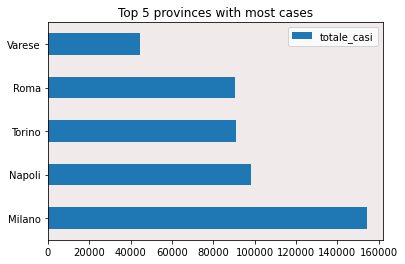

In [660]:
data_to_plot = df_provinces[["denominazione_provincia","totale_casi"]]
# group data by nlargest of max
ax = data_to_plot.groupby(["denominazione_provincia"]).max().nlargest(NUM_OF_PROVINCES, "totale_casi").plot(title=("Top "+ str(NUM_OF_PROVINCES) + " provinces with most cases"),kind="barh")
ax.set_ylabel("")
ax.set_facecolor("#F0EBEA")

Now we analyze the evolution in time of the most affected provinces.

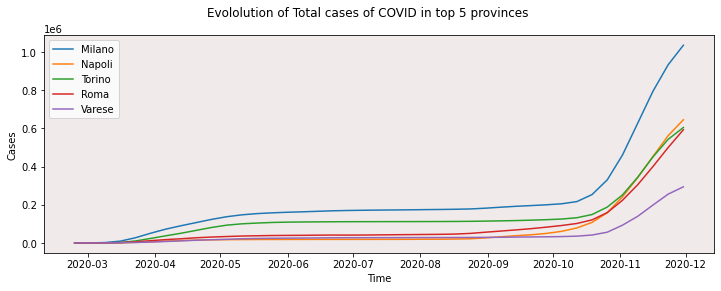

In [661]:
data_to_plot = df_provinces[["denominazione_provincia","totale_casi"]]
aux_df = data_to_plot.groupby(["denominazione_provincia"]).max().nlargest(NUM_OF_PROVINCES, "totale_casi")
nomi_province = list(aux_df.index) #print(nomi_province) #create a list with the max affected provinces

# select only the rows with most affected provinces
df_plot = df_provinces.loc[df_provinces.denominazione_provincia.isin(nomi_province)]
df_plot = df_plot.groupby(['denominazione_provincia', pd.Grouper(key='data', freq='W-MON')])['totale_casi'].sum().reset_index()
# in this case i cant use .asfreq() so i have used pd.Grouper()

# start plotting using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for reg in nomi_province:
    aux = df_plot.loc[df_plot.denominazione_provincia == reg]
    #dont print last week because grouper set a wrong value
    plt.plot(aux["data"][:-1], aux["totale_casi"][:-1], label=reg) 

fig.suptitle("Evololution of Total cases of COVID in top " + str(NUM_OF_PROVINCES)+ " provinces")
plt.xlabel('Time')
plt.ylabel('Cases')
ax.set_facecolor("#F0EBEA")
plt.legend()
plt.show()

## Data preparation for heatmap <a name="4"></a>

Now it is interesting to see how to merge the information of regions and provinces with the geometrical information to make some heatmap of COVID-19 situation.

In [662]:
# select the information from region
data_from_regions = df_regions[["data", "denominazione_regione", "totale_casi", 
                                "tamponi", "deceduti", "terapia_intensiva",
                                "totale_ospedalizzati","isolamento_domiciliare"]]
# select the last "data" because the fields "totale_casi", "tamponi", "deceduti" are cumulative
data_from_regions = data_from_regions.loc[df_regions.data == data_from_regions.iloc[[-1]]["data"].item()]

problem = data_from_regions.loc[data_from_regions.denominazione_regione.isin(["P.A. Bolzano","P.A. Trento"])]
display(problem)

,data,denominazione_regione,totale_casi,tamponi,deceduti,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare
5933,2020-12-02,P.A. Bolzano,24188,314595,542,33,449,10880
5934,2020-12-02,P.A. Trento,16167,381544,665,47,459,2000


Since in geometrical information, taken from ISTAT data,  there are not the two autonomous provinces (P.A. Bolzano,  P.A. Trento) we have to merge these two elements in one called Trentino-Alto Adige.

In [663]:
last_date = data_from_regions["data"].max()

tamponi = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano"]["tamponi"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento"]["tamponi"].values[0]

totale_casi = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano", "totale_casi"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento", "totale_casi"].values[0]

deceduti = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano", "deceduti"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento", "deceduti"].values[0]

totale_ospedalizzati = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano"]["totale_ospedalizzati"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento"]["totale_ospedalizzati"].values[0]

terapia_intensiva = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano"]["terapia_intensiva"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento"]["terapia_intensiva"].values[0]

isolamento_domiciliare = data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Bolzano"]["isolamento_domiciliare"].values[0] + data_from_regions.loc[data_from_regions.denominazione_regione == "P.A. Trento"]["isolamento_domiciliare"].values[0]

data_from_regions = data_from_regions.append({"data": last_date,  
                                              "denominazione_regione": "Trentino-Alto Adige", 
                                              "tamponi": tamponi, "totale_casi": totale_casi, 
                                              "totale_ospedalizzati": totale_ospedalizzati,
                                              "deceduti": deceduti, "terapia_intensiva": terapia_intensiva,
                                             "isolamento_domiciliare": isolamento_domiciliare}, ignore_index=True)

data_from_regions= data_from_regions.loc[~data_from_regions.denominazione_regione.isin(["P.A. Bolzano", "P.A. Trento"])]

problem_solved = data_from_regions.loc[data_from_regions.denominazione_regione.isin(["Trentino-Alto Adige"])]
display(problem_solved)

print("Number of Regions: ", len(data_from_regions))

,data,denominazione_regione,totale_casi,tamponi,deceduti,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare
21,2020-12-02,Trentino-Alto Adige,40355,696139,1207,80,908,12880


Number of Regions:  20


In provinces dataframe for eah region there are two rows (called "Fuori Regione / Provincia Autonoma" and "In fase di definizione/aggiornamento") containing data concerning the number of positive people to Covid-19 not yet assigned to any province, for this reason we have decided to redistribute those data proportionally between all the provinces whose data are based on the current data of the total people who have contracted the covid.

This is made with the multi index on "data" and "denominazione_regione".

In [664]:
# select the information from the two dataframe
data_from_regions2 = df_regions[["data", "denominazione_regione", "totale_casi","codice_regione"]]
data_from_provinces = df_provinces[["data", "denominazione_regione", "denominazione_provincia",
                                    "totale_casi","codice_provincia","lat","long"]]

merged = pd.merge(data_from_regions2, data_from_provinces, on=["denominazione_regione", "data"])
#eliminare righe con in denominazione_provincia = In fase di definizione/aggiornamento
# select the last "data" because the fields "totale_casi", "tamponi", "deceduti" are cumulative
data_from_provinces = merged.loc[df_provinces.data == merged.iloc[[-1]]["data"].item()]
# use hierarc
data_from_provinces.set_index(["data", "denominazione_regione"], inplace=True)
data_from_provinces.head(6)

totale_casi_x  codice_regione  \
data       denominazione_regione                                  
2020-12-02 Abruzzo                        28801              13   
           Abruzzo                        28801              13   
           Abruzzo                        28801              13   
           Abruzzo                        28801              13   
           Abruzzo                        28801              13   
           Abruzzo                        28801              13   

                                               denominazione_provincia  \
data       denominazione_regione                                         
2020-12-02 Abruzzo                                            L'Aquila   
           Abruzzo                                              Teramo   
           Abruzzo                                             Pescara   
           Abruzzo                                              Chieti   
           Abruzzo                  Fuori Regione / Provincia Autonoma   
           Abruzzo                In fase di definizione/aggiornamento   

                                  totale_casi_y  codice_provincia        lat  \
data       denominazione_regione                                               
2020-12-02 Abruzzo                         9350                66  42.351222   
           Abruzzo                         7716                67  42.658918   
           Abruzzo                         5767                68  42.464584   
           Abruzzo                         5513                69  42.351032   
           Abruzzo                          251               879        NaN   
           Abruzzo                          204               979        NaN   

                                       long  
data       denominazione_regione             
2020-12-02 Abruzzo                13.398438  
           Abruzzo                13.704400  
           Abruzzo                14.213648  
           Abruzzo                14.167546  
           Abruzzo                      NaN  
           Abruzzo                      NaN

In [665]:
# rename the column of merged information
data_from_provinces.columns = ["totale_casi_regione", "codice_regione",
                  "denominazione_provincia", "totale_casi_provincia", "codice_provincia",
                  "lat_prov", "long_prov"]
# display(data_from_provinces)

In [666]:
# REMOVE AND REDISTRIBUITE the FUORI/REGIONE IN FASE DI DEF su data from provinces

bad_provincie = ["Fuori Regione / Provincia Autonoma", "In fase di definizione/aggiornamento"]

new_values = []

for index in data_from_provinces.index.unique():
    
    aux = data_from_provinces.loc[index]    
    tot_cases = aux.loc[~aux.denominazione_provincia.isin(bad_provincie)].totale_casi_provincia.sum()
    out_cases = aux.loc[aux.denominazione_provincia.isin(bad_provincie)].totale_casi_provincia.sum()
    
    for provincia in aux.denominazione_provincia:
        if(provincia not in  bad_provincie):   
            new_values.append(int(aux.loc[aux.denominazione_provincia == provincia].totale_casi_provincia.sum()*(1+ (out_cases/tot_cases))))
            

new_data_from_provinces = data_from_provinces.loc[~data_from_provinces.denominazione_provincia.isin(bad_provincie)] 
new_data_from_provinces.drop(columns=["totale_casi_provincia"], inplace=True)
#print(len(new_data_from_provinces), len(new_values))
new_data_from_provinces["totale_casi_provincia"] = new_values

### Heatmap guide by ISTAT

To retrive geometrical information it is used the following guide:

https://github.com/napo/geopandas_esempi/blob/master/dati%20istat.ipynb  

Later these information are loaded with geopandas and are merged with COVID-19 data.

In [667]:
# to download ISTAT data set download to True
download = False
if download:
    zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
    r = requests.get(zipconfini)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

This generate a folder called "Limiti01012018" that contains file about:
    - Com01012018 : municipal boundaries
    - ProvCM01012018 : provinces boundaries
    - Reg01012018 : regions boundaries
    - RipGeo01012018 : geographical divisions

File name example: "Reg01012018_WGS84.shp"

In [668]:
# load the dataframe of italian regions with geopandas and the downloaded information
geometry_regions = gpd.read_file("Limiti01012018" + os.sep + "Reg01012018" + os.sep + "Reg01012018_WGS84.shp")
geometry_regions.head(1)

,COD_RIP,COD_REG,DEN_REG,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,3,12,Lazio,1.201765e+06,1.723172e+10,1.201765e+06,"MULTIPOLYGON (((769745.511 4625758.609, 769787..."


In [669]:
# load the dataframe of italian regions with geopandas and the downloaded information
geometry_provinces = gpd.read_file("Limiti01012018" + os.sep + "ProvCM01012018" + os.sep + "ProvCM01012018_WGS84.shp")
geometry_provinces.head(1)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_PCM,DEN_PROV,DEN_CM,DEN_PCM,SIGLA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,458754.447959,2.081602e+09,458754.447958,"POLYGON ((437900.551 5088796.203, 437915.020 5..."


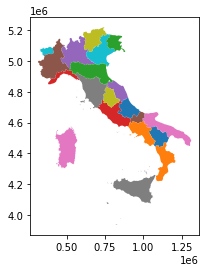

In [670]:
# example of heatmap by region
geometry_regions.plot(column='DEN_REG',legend=False, figsize=(4,4))

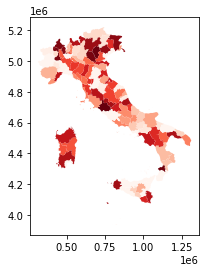

In [671]:
# example of heatmap by provinces
geometry_provinces.plot(column='DEN_PROV',cmap="Reds", figsize=(4,4))

In [672]:
# preparing data for regions heatmap
heatmap_regions_data = pd.merge(geometry_regions, data_from_regions,  left_on=  ['DEN_REG'],
                   right_on= ['denominazione_regione'])
# heatmap_regions_data.head(1)

In [673]:
# preparing data for provinces heatmap
heatmap_provinces_data = pd.merge(geometry_provinces, new_data_from_provinces,  left_on=  ['COD_PROV'],
                   right_on= ['codice_provincia'])
# heatmap_provinces_data.head(1)

## Heatmap with data <a name="5"></a>

Now with the data merged we show the three geographic heatmaps relative to the number of "totale_casi", "tamponi" and "deaths" about the regions.

We can see, for example, thanks to the three heatmaps, that more swab test are made in region "Lazio" than in "Campania" but we can also see that there are more people affected by COVID in "Campania". This fact could allow us to say that if we have done many more swab tests in "Campania" there would have been much more positive people. 

Through geographic heatmap representation at a first glance, it is possible to retrieve a national situation. In particular, we see how northern Italy was the center of pandemic.

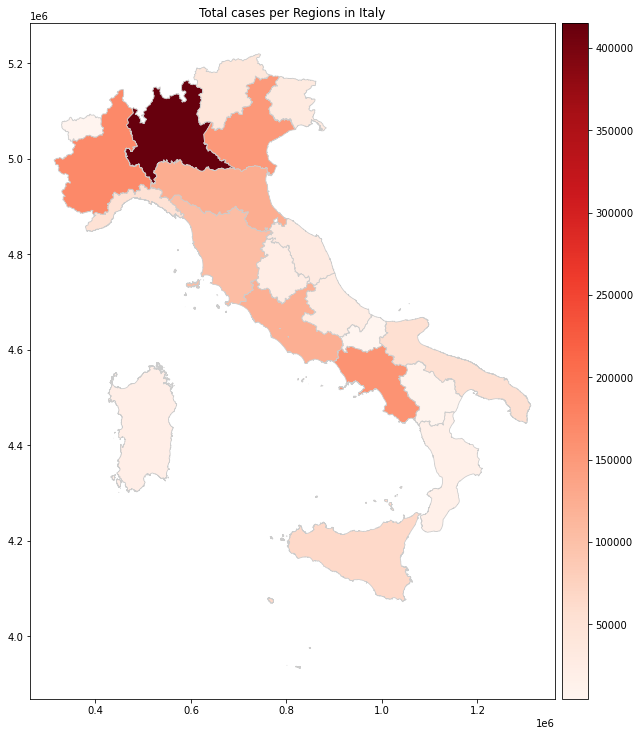

In [674]:
# Heatmap of total cases
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total cases per Regions in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_regions_data[["totale_casi"]].min()[0], heatmap_regions_data[["totale_casi"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_regions_data.plot(column="totale_casi", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8")

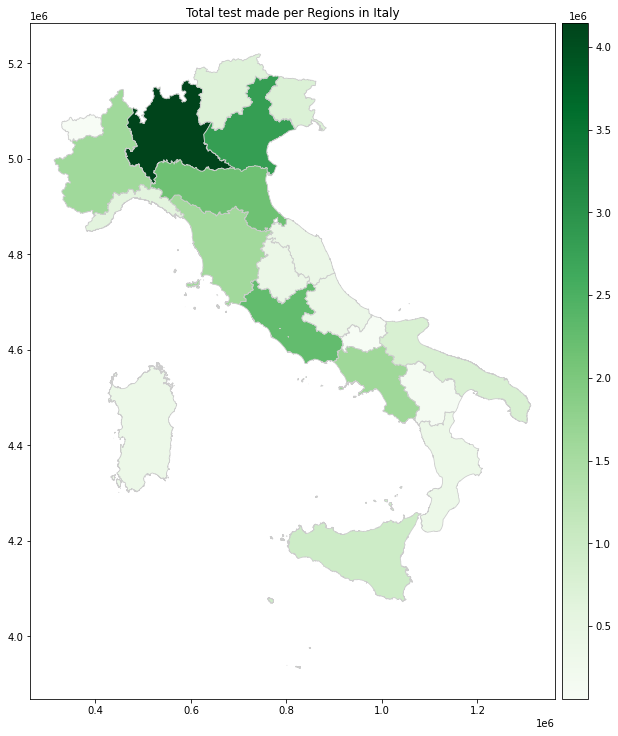

In [675]:
# Heatmap of executed test 
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total test made per Regions in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_regions_data[["tamponi"]].min()[0], heatmap_regions_data[["tamponi"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_regions_data.plot(column="tamponi", cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8")

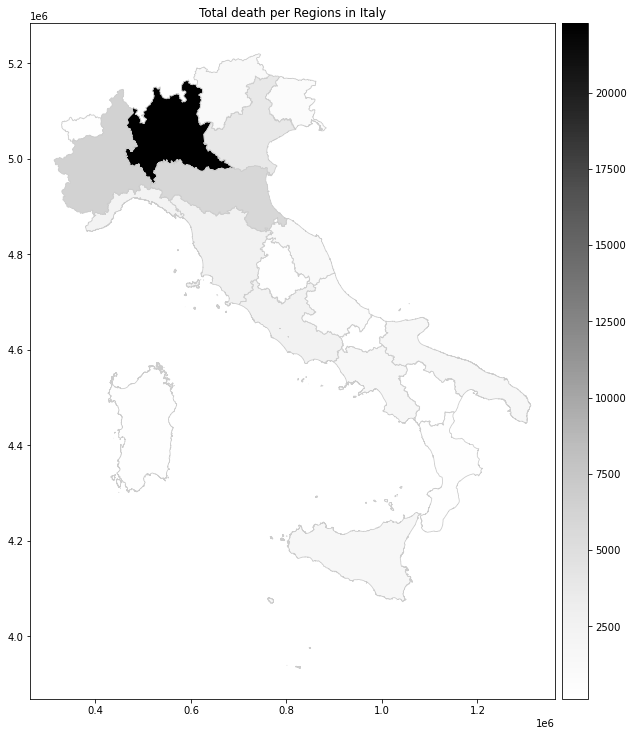

In [676]:
# Heatmap of death
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total death per Regions in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_regions_data[["deceduti"]].min()[0], heatmap_regions_data[["deceduti"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Greys", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_regions_data.plot(column="deceduti", cmap="Greys", linewidth=0.8, ax=ax, edgecolor="0.8")

### Heatmap of Provinces

Regarding provinces, we have only the "totale_casi" information and the geographic heatmap confirms the data obtained with the province's rank made in previous sections of this notebook.

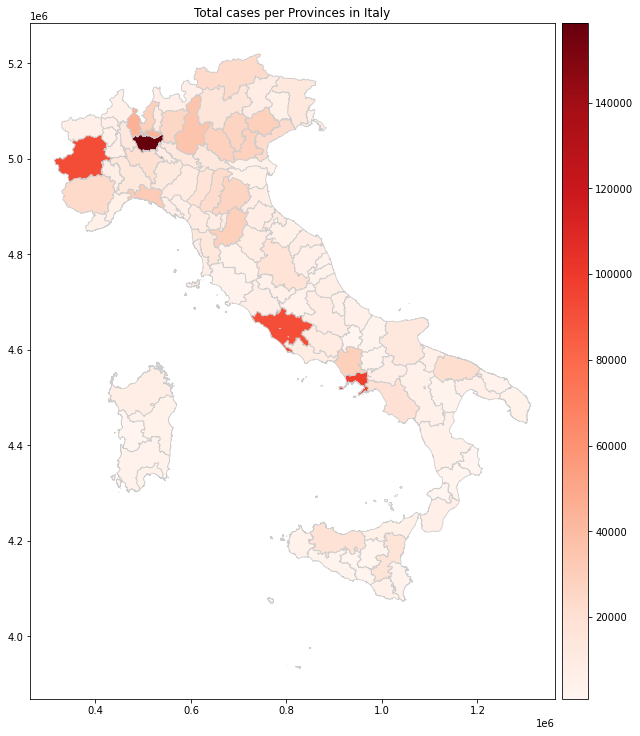

In [677]:
# Heatmap of total cases per provinces
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Total cases per Provinces in Italy")
# normalize data for colorbar 
v_min, v_max = heatmap_provinces_data[["totale_casi_provincia"]].min()[0], heatmap_provinces_data[["totale_casi_provincia"]].max()[0]
# colorbar
sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=v_min, vmax=v_max))
sm._A = []
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
# plot the graph
heatmap_provinces_data.plot(column="totale_casi_provincia", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8")

## Extra: Let's do some Machine Learning on data


We could try some machine learning on the available data. In particular, we choose to use the [k-means](https://it.wikipedia.org/wiki/K-means) algorithm to identify 3 clusters that correspond to the yellow, orange and red areas that we see on today's news.

To perform k-means we used the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) library which allow to do it in a few lines of code.

#### NB:
Obviously the view will be different from those we see today because we can run this algorithm only on the data available but it would be interesting as a future job to have more data to analyze, for example, the number of beds in hospitals for each province or municipality to made a more complete analysis of the zones' situation.

Morevoer we have created a csv file with the total amount of population for each region. This csv is referred to the ISTAT national data and we want to use it later for scaling the parameters for k-means.

In [678]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

k_data = data_from_regions.copy() # this data are referred to today
k_data = k_data.sort_values(by=['denominazione_regione'])
# i took this file from ISTAT data
region_population = pd.read_csv("popolazione_regione.csv")
#display(region_population)
k_data = pd.merge(k_data, region_population, left_on=  ['denominazione_regione'],
                   right_on= ['den_reg'])
print(k_data.columns)
# display(k_data)
# now i have the totale_popolazione column for make the percentage

Index(['data', 'denominazione_regione', 'totale_casi', 'tamponi', 'deceduti',
       'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare',
       'den_reg', 'totale_popolazione'],
      dtype='object')


In [679]:
# discard the column "data", "denominazione_regione" and "den_reg" for made k-means on other column
regions = list(k_data.denominazione_regione)
k_data = k_data.drop(columns=["data", "denominazione_regione", "den_reg"]) 
k_data_scaled = k_data.copy()
print(k_data.columns)
# display(k_data)

Index(['totale_casi', 'tamponi', 'deceduti', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_popolazione'],
      dtype='object')


In [680]:
k_data = k_data.drop(columns=["totale_popolazione","tamponi"])
# transform data to numpy array
numpy_data = k_data.to_numpy()

# normalization of data  (x -mu)/sigma^2 
# (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html=)
scaler = StandardScaler()
scaler.fit(numpy_data)
scaler.transform(numpy_data)

# uses kmeans from sklearn 3 cluster that represent the zone in italy: yellow-orange-red
kmeans = KMeans(n_clusters=3, random_state=0).fit(numpy_data)
labels = kmeans.labels_ # labels = zones

# construct a df with denominazione regione saved before and labels of zones
data_frame = pd.DataFrame(data= {"denominazione_regione": regions, "labels": labels})
geometry_regions = geometry_regions.sort_values(by=['DEN_REG'])

# merge labels with geometry info about region for heatmap
heatmap = pd.merge(geometry_regions, data_frame,  left_on=  ['DEN_REG'],
                   right_on= ['denominazione_regione'])

# display(heatmap)

We decided to make a preliminary k means on the data that we have available, this show us a different point of view compared to what we are used to seeing nowadays.

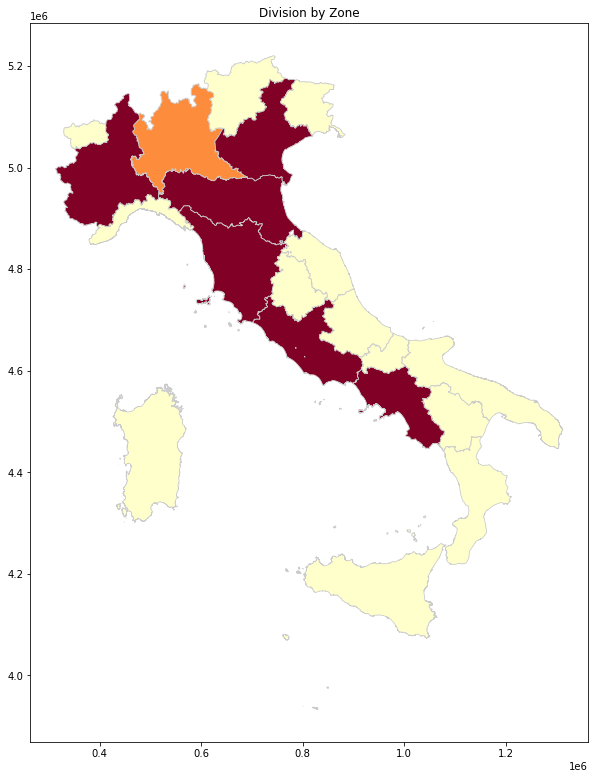

In [681]:
# Heatmap of italy zones
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Division by Zone")
# plot the graph
heatmap.plot(column="labels", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8")

### *Interactive Cell*

All the available data were saved as "k_data_scaled" since we would like to scale them; two tests were performed; this is an interactive cell therefore you can choose to run TEST = 1 or TEST = 2 in the cell below. 

The aim of TEST = 1 is to calculate every field in percentage by the "totale_popolazione" of each region, for this reason, all data were divided by "totale_popolazione" and the column "totale_popolazione" was dropped, the result is an interesting point of view where we can see how the most susceptible regions to Covid-19 were in NE of Italy but also Basilicata, Marche, and Abruzzo that are not so densely populated.

Regarding TEST = 2 when done it shows us different results, since the data are scaled by "totale_casi" the red regions could be the ones who actually suffered from a higher amount of positive swabs and therefore higher values of all the rest of the data or the result as red regions could be due to the fact that swabs were performed mainly on symptomatic patients.

The same test was run also on various combinations of data to get a more complete vision of the Italian situation.

Combining data in different ways we obtain various views of COVID-19 situation, the three colors assignment is always different from the one available on conventional media (newspapers, newscast, etc..) this is caused by the fact that data regarding all the parameters that the government used to assign the three color to all regions are not available.

In [682]:
TEST = 1 # u can change it !!!
if TEST == 1:
    k_data_scaled = k_data_scaled[['totale_casi', 'tamponi', 'deceduti','totale_popolazione', 
                     'terapia_intensiva', 'totale_ospedalizzati',
            'isolamento_domiciliare']].div(k_data_scaled.totale_popolazione, axis=0) 
elif TEST == 2: 
        k_data_scaled = k_data_scaled[['totale_casi', 'tamponi', 'deceduti','totale_popolazione', 
                     'terapia_intensiva', 'totale_ospedalizzati',
            'isolamento_domiciliare']].div(k_data_scaled.totale_casi, axis=0) 

In [683]:
k_data_scaled = k_data_scaled.drop(columns=["totale_casi","totale_popolazione","tamponi"])

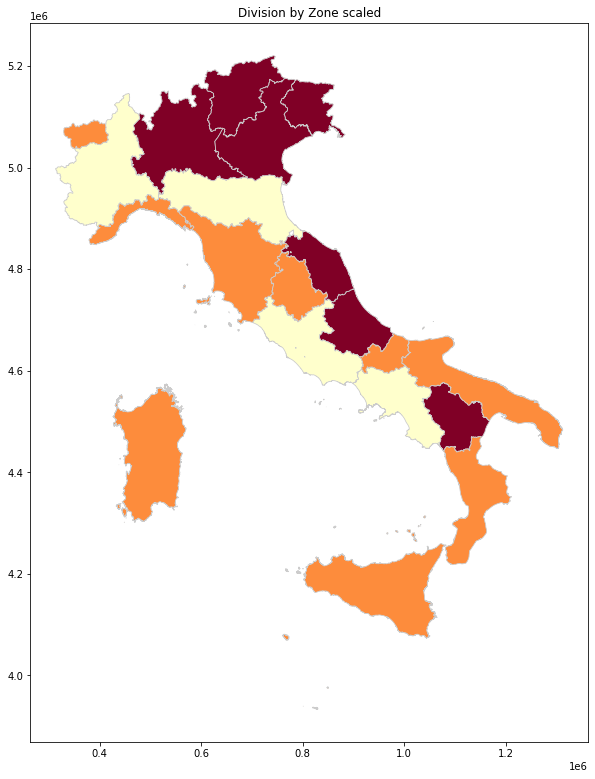

In [684]:
# transform data to numpy array
numpy_data = k_data_scaled.to_numpy()

# normalization of data  (x -mu)/sigma^2 
# (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html=)
scaler = StandardScaler()
scaler.fit(numpy_data)
scaler.transform(numpy_data)

# uses kmeans from sklearn 3 cluster that represent the zone in italy: yellow-orange-red
kmeans = KMeans(n_clusters=3, random_state=0).fit(numpy_data)
labels = kmeans.labels_ # labels = zones

# construct a df with denominazione regione saved before and labels of zones
data_frame = pd.DataFrame(data= {"denominazione_regione": regions, "labels": labels})
geometry_regions = geometry_regions.sort_values(by=['DEN_REG'])

# merge labels with geometry info about region for heatmap
heatmap = pd.merge(geometry_regions, data_frame,  left_on=  ['DEN_REG'],
                   right_on= ['denominazione_regione'])

# Heatmap of italy zones
fig, ax = plt.subplots(1, figsize=(10, 18))
ax.set_title("Division by Zone scaled")
# plot the graph
heatmap.plot(column="labels", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8")